# Rating Prediction Project

## Problem Statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd

#Importing the libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing nltk Libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

#Importing libraries for Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, hamming_loss, log_loss

#Importing library to remove Outliers
from scipy.stats import zscore

#Importing library for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading the Scraped dataset
df=pd.read_csv('Amazon_Flipkart_Reviews.csv')
df

,Unnamed: 0,Review Title,Review Text,Ratings
0,0,Suitable for School kids,If you are a College student or a professional...,2.0 out of 5 stars
1,1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2.0 out of 5 stars
2,2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2.0 out of 5 stars
3,3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2.0 out of 5 stars
4,4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2.0 out of 5 stars
...,...,...,...,...
35169,19392,Terrific purchase,Excellent monitor got it at great price of 720...,5
35170,19393,Worth the money,"Good, but rate high when compared",4
35171,19394,Excellent,Super Q,5
35172,19395,Simply awesome,Super se uper,5


There are 35174 rows and 4 columns in the dataset.

I have collected data by scrapping from amazon and flipkart. Our index is Unnamed: 0, let's removed that. 

###### Feature Info:
    Review Title=Title of the review
    Review Text=Text content of the review
    Ratings=Ratings out of 5 Stars.

In [3]:
#Removed Unnamed: 0 Column from the dataset
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,Review Title,Review Text,Ratings
0,Suitable for School kids,If you are a College student or a professional...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2.0 out of 5 stars
2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2.0 out of 5 stars
4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2.0 out of 5 stars


# Exploratory Data Analysis

In [5]:
#Checking the shape of dataset
df.shape

(35174, 3)

There are 35174 rows and 3 columns

In [6]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35174 entries, 0 to 35173
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  33263 non-null  object
 1   Review Text   33251 non-null  object
 2   Ratings       33264 non-null  object
dtypes: object(3)
memory usage: 824.5+ KB


In [7]:
#Checking the columns names
df.columns

Index(['Review Title', 'Review Text', 'Ratings'], dtype='object')

In [8]:
#Checking the unique values in the dataset
df.nunique()

Review Title     7727
Review Text     17113
Ratings            10
dtype: int64

In [9]:
#Checking the data types
df.dtypes

Review Title    object
Review Text     object
Ratings         object
dtype: object

All the columns is object data type.

In [10]:
#Checking the null values
df.isnull().sum()

Review Title    1911
Review Text     1923
Ratings         1910
dtype: int64

In all the columns null value is present.

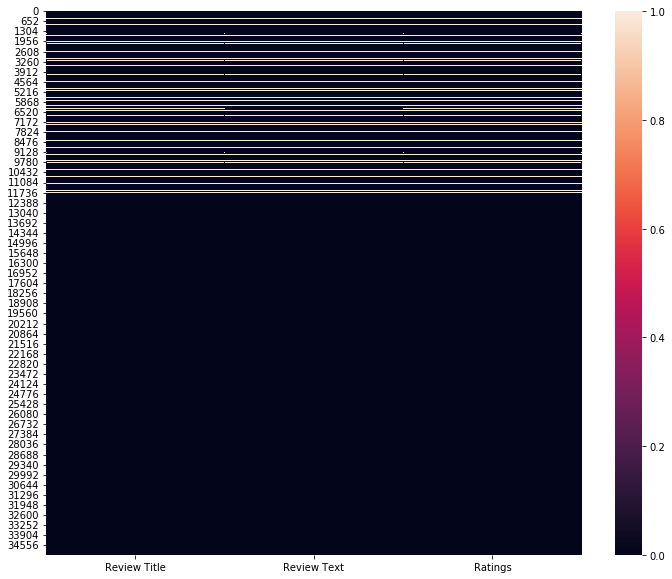

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.show()

In [12]:
#Checking the count of Ratings
df['Ratings'].value_counts()

5                     13204
4                      4395
1                      3339
5.0 out of 5 stars     2189
1.0 out of 5 stars     2176
4.0 out of 5 stars     2034
3.0 out of 5 stars     1870
2.0 out of 5 stars     1728
3                      1481
2                       848
Name: Ratings, dtype: int64

In [13]:
#Checking the mode in Review title
df['Review Title'].mode()

0    Wonderful
dtype: object

In Review Title "Wonderful" is frequently repeated.

In [14]:
#Checking the mode in Review Text
df['Review Text'].mode()

0    Good
dtype: object

In Review Text "Good" is frequently repeated.

In [15]:
#Checking the mode in Ratings
df['Ratings'].mode()

0    5
dtype: object

In Ratings 5 is frequently repeated.

In [16]:
#Lets replace the nan with mode of each columns
df['Review Title']=df['Review Title'].fillna(df['Review Title'].mode()[0])
df['Review Text']=df['Review Text'].fillna(df['Review Text'].mode()[0])
df['Ratings']=df['Ratings'].fillna(df['Ratings'].mode()[0])

In [17]:
#Checking the null value after replaced with mode
df.isnull().sum()

Review Title    0
Review Text     0
Ratings         0
dtype: int64

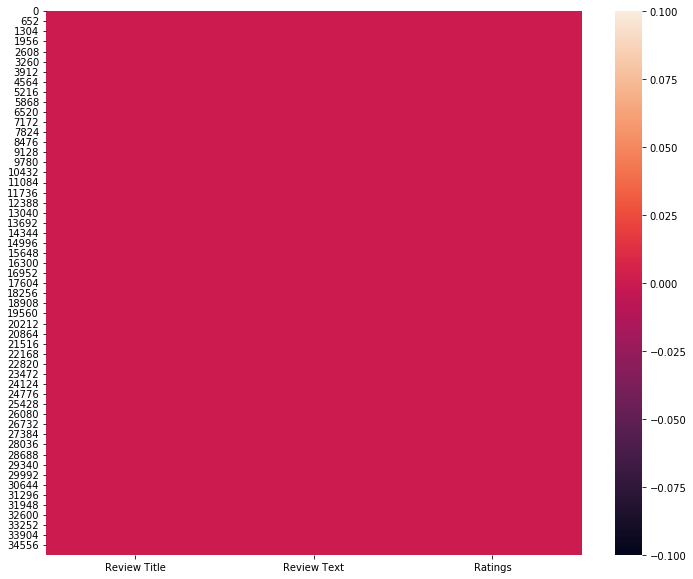

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.show()

We have replaced the null value with mode. Now data looks good. There is no null value present in the dataset.

In [19]:
#Checking the unique values in Ratings
df['Ratings'].unique()

array(['2.0 out of 5 stars', '5', '3.0 out of 5 stars',
       '1.0 out of 5 stars', '5.0 out of 5 stars', '4.0 out of 5 stars',
       '4', '3', '1', '2'], dtype=object)

In [20]:
#Let's remove the .0 out of 5 stars from the data the Ratings dataset
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)

In [21]:
#Let's change the Ratings data type to int
df['Ratings']=df['Ratings'].astype('int')

In [22]:
df['Ratings'].dtype

dtype('int32')

In [23]:
#Checking the sample data
df.sample(10)

,Review Title,Review Text,Ratings
6244,Wonderful,Good,5
30325,Great product,Awesome,5
9791,not up to the standard...,Hi everyone... I bought this headphones after ...,1
10968,Please suggest how can I repair it,I cannot hear any music from the right side,1
27535,Mind-blowing purchase,super,5
31198,Terrific purchase,Nice prodect. Best in price well packed. Easy ...,5
12778,Expected a better product,Laptop is OK. Want to share some problems I fa...,2
3364,Ridiculously good,The Sound Quality for the price is unbelievabl...,5
9558,Terrific purchase 👌,I really used these earphones<br>More than 2 m...,5
278,Best laptop go for it....,&nbsp;Writing review after a week of using my ...,4


In [24]:
#Let's combine the Review Title and Review Text
df['Review']=df['Review Title'].map(str)+ ' '+df['Review Text']
df

,Review Title,Review Text,Ratings,Review
0,Suitable for School kids,If you are a College student or a professional...,2,Suitable for School kids If you are a College ...
1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2,Misrepresentation on MS Office 2019 license - ...
2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2,The sold me renewed laptop It’s look like rene...
3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2,Amazon dupes with specification/ battery sucks...
4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2,Low Quality and Low Battery performance Build ...
...,...,...,...,...
35169,Terrific purchase,Excellent monitor got it at great price of 720...,5,Terrific purchase Excellent monitor got it at ...
35170,Worth the money,"Good, but rate high when compared",4,"Worth the money Good, but rate high when compared"
35171,Excellent,Super Q,5,Excellent Super Q
35172,Simply awesome,Super se uper,5,Simply awesome Super se uper


We have combined the Review Title and Review Text into single column named as Review. Let's drop the Review title and Review Text from the dataset.

In [25]:
df.drop(columns=['Review Title','Review Text'],inplace=True)

In [26]:
df.head(9)

,Ratings,Review
0,2,Suitable for School kids If you are a College ...
1,2,Misrepresentation on MS Office 2019 license - ...
2,2,The sold me renewed laptop It’s look like rene...
3,2,Amazon dupes with specification/ battery sucks...
4,2,Low Quality and Low Battery performance Build ...
5,2,Disappointed Below average display and low bui...
6,2,Display back light issue Display gone with 2 m...
7,2,"Laptop is ok, battery is really bad Battery is..."
8,2,No for professional works Blue screen while po...


In [27]:
#Checking the top 10 Review
df['Review'][0:10]

0    Suitable for School kids If you are a College ...
1    Misrepresentation on MS Office 2019 license - ...
2    The sold me renewed laptop It’s look like rene...
3    Amazon dupes with specification/ battery sucks...
4    Low Quality and Low Battery performance Build ...
5    Disappointed Below average display and low bui...
6    Display back light issue Display gone with 2 m...
7    Laptop is ok, battery is really bad Battery is...
8    No for professional works Blue screen while po...
9    monitor power issue monitor is not turning on ...
Name: Review, dtype: object

We see that in Review it contains the punctution, stop words.

In [28]:
#Let's apply the regular expression to make the contracted words to full form words, removing url and unwanted text
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [29]:
#Converting the Review to lower case
df['Review']=df['Review'].apply(lambda x: x.lower())

In [30]:
df['Review'].head() #We have converted to lower case

0    suitable for school kids if you are a college ...
1    misrepresentation on ms office 2019 license - ...
2    the sold me renewed laptop it’s look like rene...
3    amazon dupes with specification/ battery sucks...
4    low quality and low battery performance build ...
Name: Review, dtype: object

In [31]:
#Removing the puntuation
df['Review']=df['Review'].str.replace('[^\w\s\n]','')

In [32]:
df['Review'][2]

'the sold me renewed laptop its look like renewed laptop because laptop charging jack is loose and left side speaker sounds like its tear bad sound quality  and finger sensor quality look like 2011 touch phone of wing and any chinese phone touch waste of money and one more thing day by day amazon product quality getting poor'

In [33]:
#Remove Stopwords
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
df['Review']=df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [35]:
df['Review'][1] #Removed the stop words, punctuation from review

'misrepresentation ms office 2019 license one month trial update one month usage ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate hp support shared product sheet stated laptop came trial version ms office 2019 chasing seller appario retail honour commitmentbrbrbad experience paying high price around 67000 preinstalled genuine softwarebrbrother wise product sleek looks superfast fingerprint scanner good display responsive touchpad decent tinny speakers usb c barrel plug charging options 10 second boot ssd drive preloaded win10 home ms office sure whether trial full version drawbacks weighs 142 kg base gets warm rather quickly power adapter decent college student'

In [36]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [37]:
df['Review']=df['Review'].apply(lambda x:scrub_words(x))

In [38]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop hangs often runs cannot install essential computer science software eclipse android studio laptop diesbrbri took laptop thinking good performance based configurationbrbrbut someone wants attend online classes browse may go laptop'

In [39]:
#Checking the count of Word from Review
df['Review_wordcount']=df['Review'].apply(lambda x: len(str(x).split(' ')))

In [40]:
df

,Ratings,Review,Review_wordcount
0,2,suitable school kids college student professio...,43
1,2,misrepresentation ms office license one month...,102
2,2,sold renewed laptop look like renewed laptop l...,43
3,2,amazon dupes specification battery sucks nbspi...,21
4,2,low quality low battery performance build qual...,29
...,...,...,...
35169,5,terrific purchase excellent monitor got great ...,11
35170,4,worth money good rate high compared,6
35171,5,excellent super q,3
35172,5,simply awesome super se uper,5


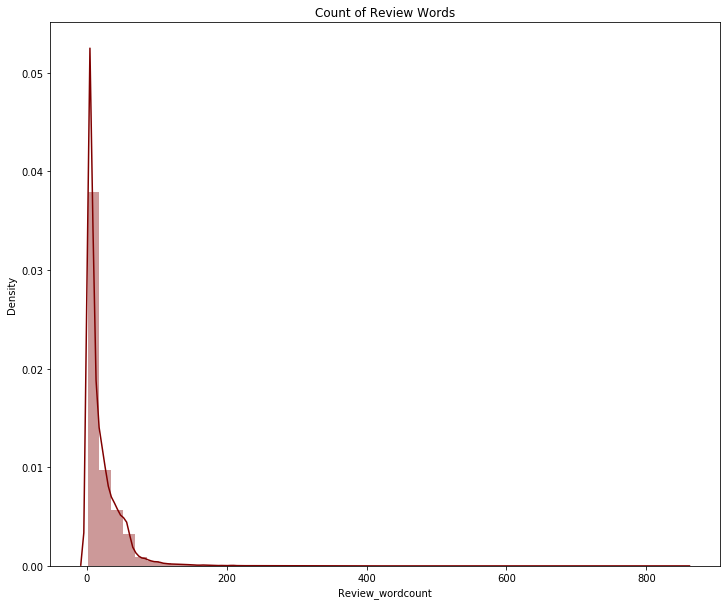

In [41]:
#Visualizing the count of words using the distribution plot
plt.figure(figsize=(12,10))
sns.distplot(df['Review_wordcount'],color='Maroon',hist=True)
plt.title("Count of Review Words")
plt.show()

In the above distribution plot we see that our words lie in the range 0-200. Most of the reviews are lengthy that can act as an Outliers. 

In [42]:
#Checking the count of character in reviews
df['Review_countchar']=df['Review'].str.len()
df

,Ratings,Review,Review_wordcount,Review_countchar
0,2,suitable school kids college student professio...,43,330
1,2,misrepresentation ms office license one month...,102,687
2,2,sold renewed laptop look like renewed laptop l...,43,260
3,2,amazon dupes specification battery sucks nbspi...,21,138
4,2,low quality low battery performance build qual...,29,203
...,...,...,...,...
35169,5,terrific purchase excellent monitor got great ...,11,72
35170,4,worth money good rate high compared,6,35
35171,5,excellent super q,3,17
35172,5,simply awesome super se uper,5,28


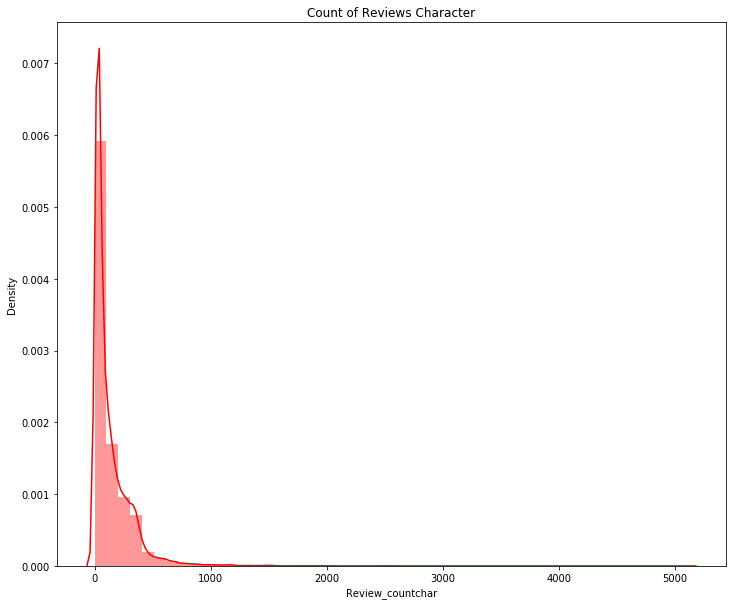

In [43]:
#Visualizing the count of characters using the distribution plot
plt.figure(figsize=(12,10))
sns.distplot(df['Review_countchar'],color='red',hist=True,kde=True)
plt.title("Count of Reviews Character")
plt.show()

We see the most of the character lies in the range 0-100. Most of review's characters are lengthy.

# Removing Outliers

In [44]:
df.shape #Checking the shape before removing the outliers

(35174, 4)

In [45]:
from scipy import stats
z_score=zscore(df[['Review_wordcount']])
outliers=np.abs(z_score)
outliers

array([[0.87188016],
       [3.11261357],
       [0.87188016],
       ...,
       [0.64726113],
       [0.57130406],
       [0.57130406]])

In [46]:
df_new= (outliers < 3).all(axis = 1)
df=df[df_new]

In [47]:
df.shape

(34611, 4)

In [48]:
outlier=((35174-34611)/35174)*100
round(outlier,2)

1.6

2% of data removed during the outliers removal process.

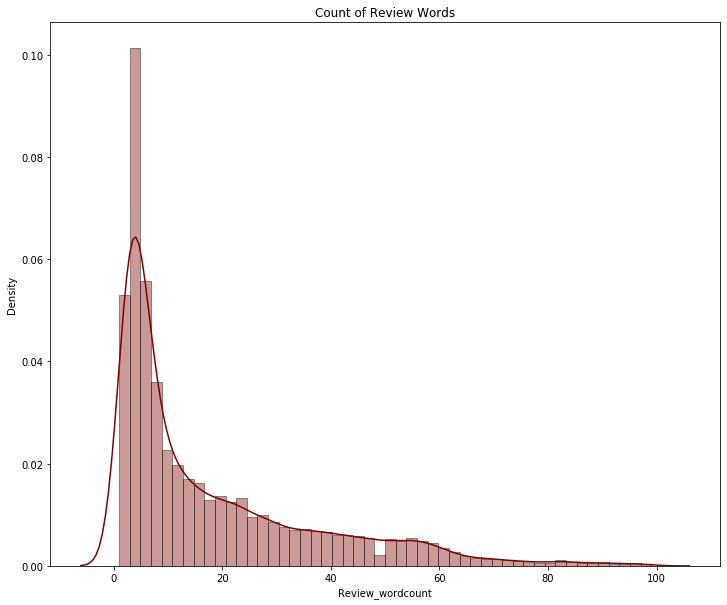

In [49]:
#Visualizing the count of words using the distribution plot after removing the outliers
plt.figure(figsize=(12,10))
sns.distplot(df['Review_wordcount'],color='Maroon',hist=True,hist_kws={'edgecolor':'black'})
plt.title("Count of Review Words")
plt.show()

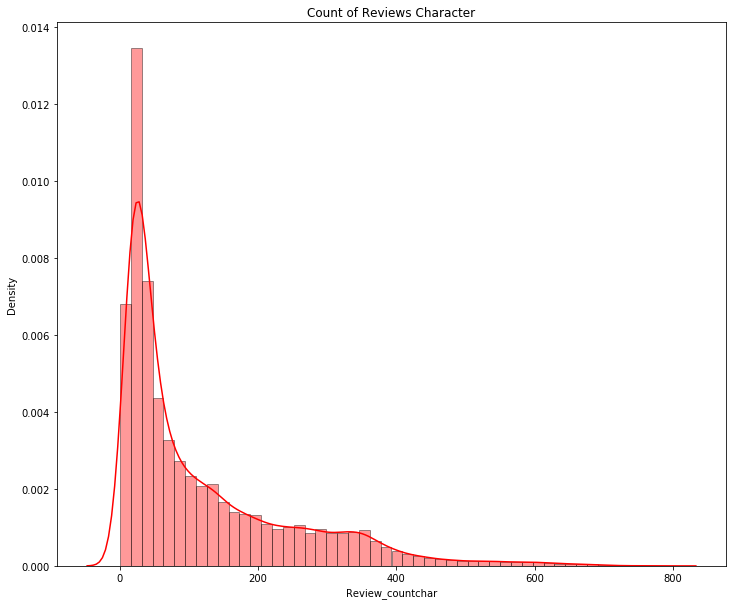

In [50]:
#Visualizing the count of characters using the distribution plot after removing the outliers
plt.figure(figsize=(12,10))
sns.distplot(df['Review_countchar'],color='red',hist=True,kde=True,hist_kws={'edgecolor':'black'})
plt.title("Count of Reviews Character")
plt.show()

We clearly see that we have removed the outliers from the Review.

# Visualizing the Word Cloud

In [51]:
from wordcloud import WordCloud

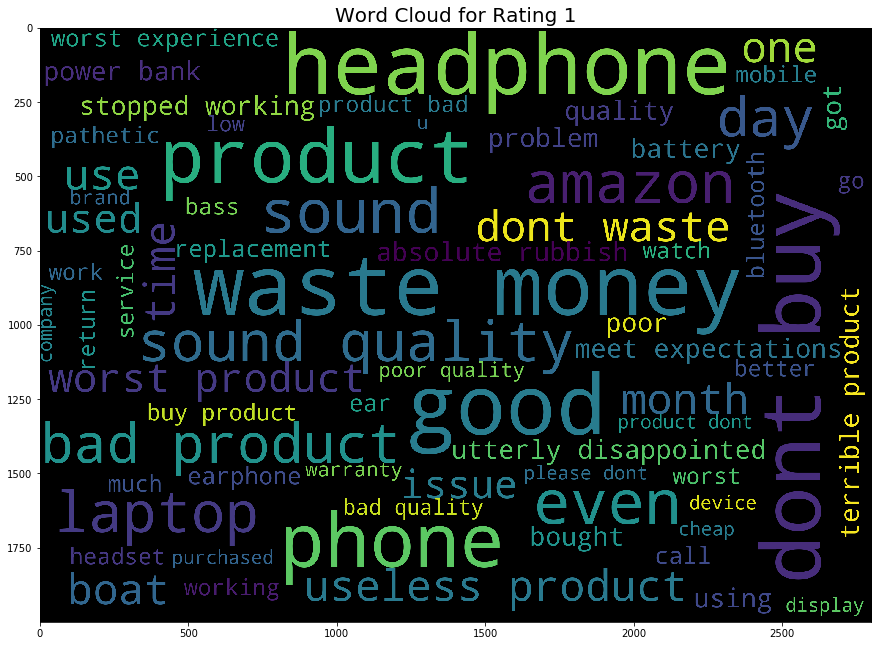

In [52]:
#Visualizing the Word Cloud for Rating 1
plt.figure(figsize=(12,9))
r1=df['Review'][df['Ratings']==1]
word_cloud=WordCloud(height=500,width=700,background_color='black',max_words=70,max_font_size=70,scale=4).generate(' '.join(r1))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Rating 1",fontsize=20)
plt.show()

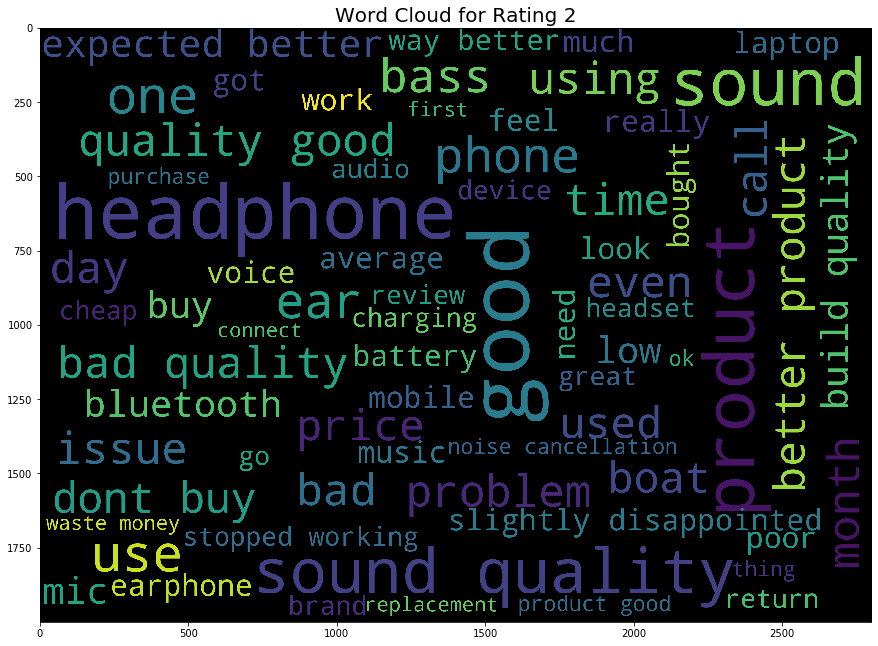

In [53]:
#Visualizing the Word Cloud for Rating 2
plt.figure(figsize=(12,9))
r1=df['Review'][df['Ratings']==2]
word_cloud=WordCloud(height=500,width=700,background_color='black',max_words=70,max_font_size=70,scale=4).generate(' '.join(r1))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Rating 2",fontsize=20)
plt.show()

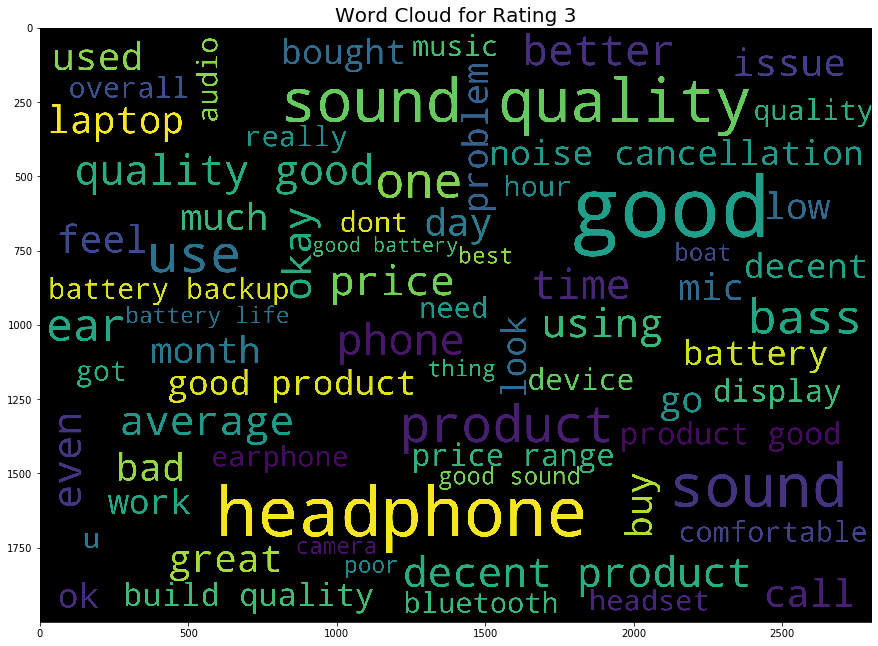

In [54]:
#Visualizing the Word Cloud for Rating 3
plt.figure(figsize=(12,9))
r1=df['Review'][df['Ratings']==3]
word_cloud=WordCloud(height=500,width=700,background_color='black',max_words=70,max_font_size=70,scale=4).generate(' '.join(r1))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Rating 3",fontsize=20)
plt.show()

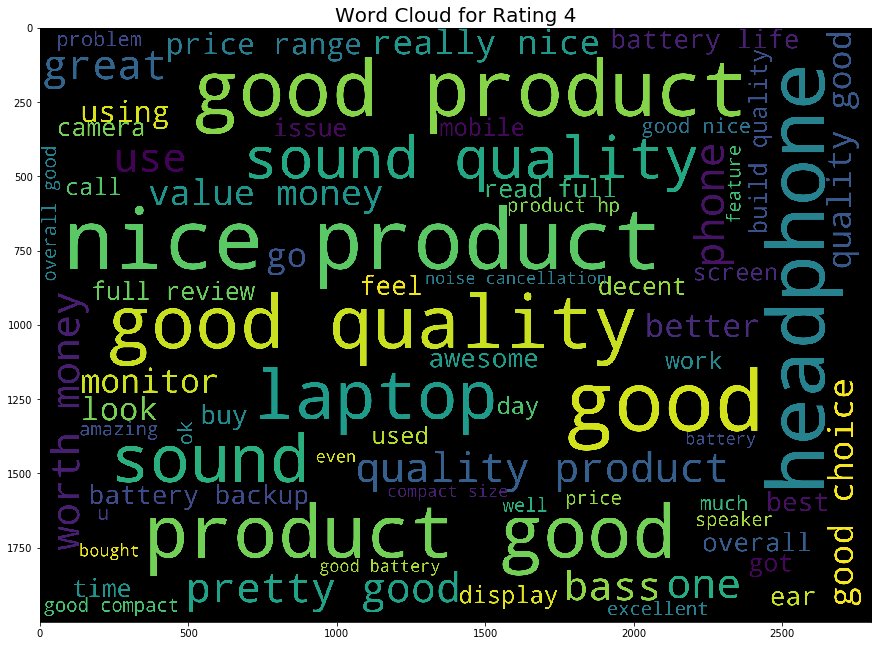

In [55]:
#Visualizing the Word Cloud for Rating 4
plt.figure(figsize=(12,9))
r1=df['Review'][df['Ratings']==4]
word_cloud=WordCloud(height=500,width=700,background_color='black',max_words=70,max_font_size=70,scale=4).generate(' '.join(r1))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Rating 4",fontsize=20)
plt.show()

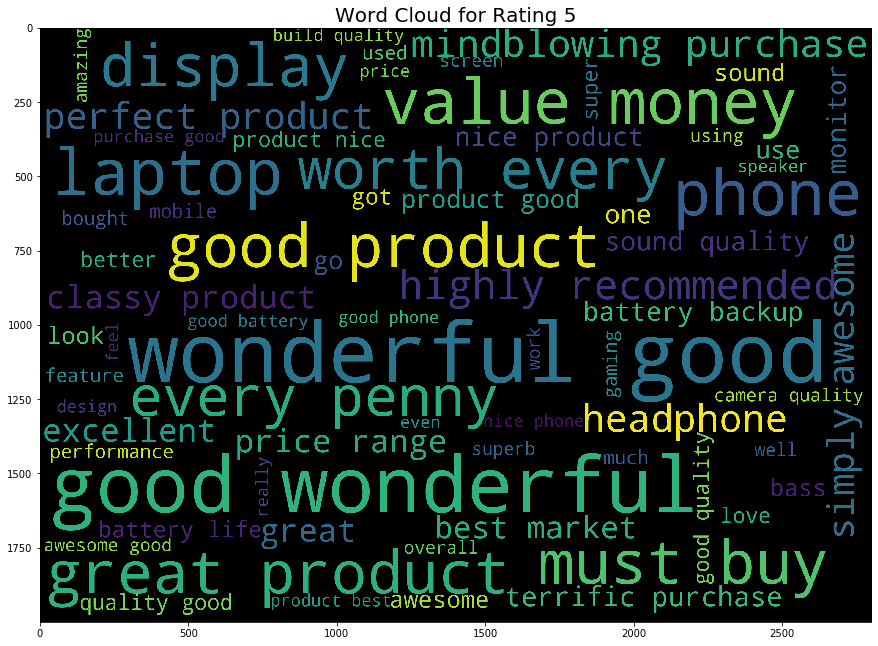

In [56]:
#Visualizing the Word Cloud for Rating 5
plt.figure(figsize=(12,9))
r1=df['Review'][df['Ratings']==5]
word_cloud=WordCloud(height=500,width=700,background_color='black',max_words=70,max_font_size=70,scale=4).generate(' '.join(r1))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Rating 5",fontsize=20)
plt.show()

In [57]:
#Checking the count of Ratings
df['Ratings'].value_counts()

5    17124
4     6255
1     5438
3     3270
2     2524
Name: Ratings, dtype: int64

5    17124
4     6255
1     5438
3     3270
2     2524
Name: Ratings, dtype: int64


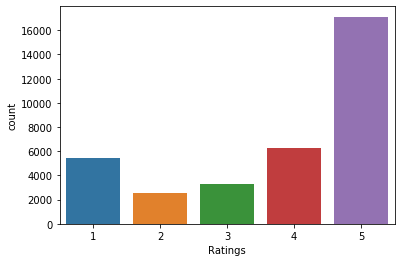

In [91]:
print(df['Ratings'].value_counts())
sns.countplot(df['Ratings'])
plt.show()

# Model Building

In [59]:
#Splitting the data into Features and Target variables.
x=df['Review']
y=df['Ratings']

In [98]:
x=df['Review']
x

0        suitable school kids college student professio...
2        sold renewed laptop look like renewed laptop l...
3        amazon dupes specification battery sucks nbspi...
4        low quality low battery performance build qual...
5        disappointed average display low build quality...
                               ...                        
35169    terrific purchase excellent monitor got great ...
35170                  worth money good rate high compared
35171                                    excellent super q
35172                         simply awesome super se uper
35173                    awesome worthy offer monitor good
Name: Review, Length: 34611, dtype: object

In [73]:
y.value_counts()

5    17124
4     6255
1     5438
3     3270
2     2524
Name: Ratings, dtype: int64

Majority of people rated 5 ratings.

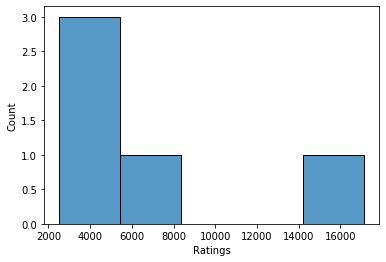

In [75]:
sns.histplot(y.value_counts())

### Converting the text data into vector using Tfidf Vectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [62]:
train_word_features

<34611x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1003704 stored elements in Compressed Sparse Row format>

In [101]:
character_vectorizer=TfidfVectorizer(sublinear_tf=True,
                                    strip_accents='unicode',
                                    analyzer='word',
                                    stop_words='english',
                                    ngram_range=(2,6),
                                    max_features=50000)
character_vectorizer.fit(x)
train_character_vectorizer=character_vectorizer.transform(x)

In [64]:
train_character_vectorizer

<34611x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 531923 stored elements in Compressed Sparse Row format>

In [65]:
#Combining both word and character vector as input
from scipy.sparse import hstack

In [66]:
features=hstack([train_word_features,train_character_vectorizer])

In [67]:
features

<34611x150000 sparse matrix of type '<class 'numpy.float64'>'
	with 1535627 stored elements in COOrdinate format>

In [68]:
#Splitting the data into training and testing

x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=.30,random_state=42)

In [69]:
x_train.shape

(24227, 150000)

In [70]:
x_test.shape

(10384, 150000)

In [71]:
y_train.shape

(24227,)

In [72]:
y_test.shape

(10384,)

In [76]:
#Checking the count of target variable
y.value_counts()

5    17124
4     6255
1     5438
3     3270
2     2524
Name: Ratings, dtype: int64

Our target variable is imbalance. Let's balance the data using the oversampling technique.

In [77]:
from imblearn.over_sampling import SMOTE

In [121]:
SM=SMOTE()
x,y=SM.fit_resample(x_train,y_train)

In [89]:
y.value_counts()

1    11943
2    11943
3    11943
4    11943
5    11943
Name: Ratings, dtype: int64

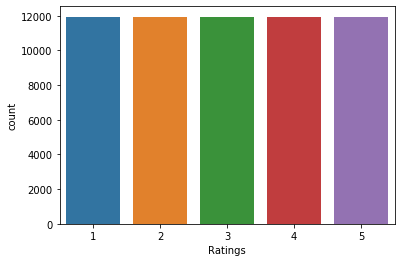

In [103]:
sns.countplot(y)

Our target variable is now balanced. We are good to proceed to train and test the model.

# Model Building

In [125]:
#Initiating the model
dr=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
lg=LogisticRegression()
mnb=MultinomialNB()
xgb=XGBClassifier()
sgd=SGDClassifier()

In [132]:
#Defining the model
def algorithm(model):
    print("*"*30+model.__class__.__name__+"*"*30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,'\n')
    print("Classification report:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred),'\n')
    print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    print("Hamming Loss:",hamming_loss(y_test,y_pred))
    print("*"*100)
    print("\n\n")
    

In [133]:
for model in [dr,rf,ada,gbc,lg,mnb,xgb,sgd]:
    algorithm(model)

******************************DecisionTreeClassifier******************************
Accuracy Score: 83.02195685670262 

Classification report:
               precision    recall  f1-score   support

           1       0.83      0.85      0.84      1641
           2       0.64      0.57      0.60       768
           3       0.62      0.65      0.64       955
           4       0.76      0.74      0.75      1839
           5       0.92      0.93      0.92      5181

    accuracy                           0.83     10384
   macro avg       0.75      0.75      0.75     10384
weighted avg       0.83      0.83      0.83     10384

Confusion Matrix:
 [[1396   91   81   32   41]
 [ 143  439   85   61   40]
 [  62   80  621  105   87]
 [  53   45  120 1367  254]
 [  30   36   92  225 4798]] 

Mean Squared Error: 0.5200308166409862
Mean Absolute Error: 0.26251926040061635
Hamming Loss: 0.1697804314329738
*********************************************************************************************

# 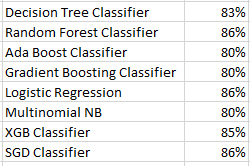

The above is the accuracy score of the model.

# Cross Validation Score

In [135]:
def cross_val(CV):
    print("*"*30+CV.__class__.__name__+"*"*30)
    print("Cross Validation Score :",cross_val_score(CV, x,y,cv=3).mean()*100)
    print("\n")

In [136]:
for CV in [dr,rf,ada,gbc,lg,mnb,xgb,sgd]:
    cross_val(CV)

******************************DecisionTreeClassifier******************************
Cross Validation Score : 88.3329146780541


******************************RandomForestClassifier******************************
Cross Validation Score : 95.86368584107846


******************************AdaBoostClassifier******************************
Cross Validation Score : 68.70635518713891


******************************GradientBoostingClassifier******************************
Cross Validation Score : 83.16335928996065


******************************LogisticRegression******************************
Cross Validation Score : 93.5828518797622


******************************MultinomialNB******************************
Cross Validation Score : 90.69747969521896


******************************XGBClassifier******************************
[14:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the 

After analysis of various model and cross validation score. I choose Random Forest Classifier as my final model. It gives a good score. Let's do the hyper paramater tuning to see if we can increase accuracy of our model.

# Hyper Parameter Tuning

In [141]:
grid_params={
    'n_estimators':[100,150],
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,3),
    'min_samples_split':range(2,10,3),
    'max_features':['auto','log2']

}

In [142]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_params,cv=3,n_jobs=-1,verbose=3)

In [143]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10, 3),
                         'min_samples_split': range(2, 10, 3),
                         'n_estimators': [100, 150]},
             verbose=3)

In [144]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

# Final Model

In [161]:
model=RandomForestClassifier(criterion='gini',n_estimators=150)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [162]:
pred=model.predict(x_test)
print("Predicted value:\n",pred)

Predicted value:
 [5 4 5 ... 1 4 5]


In [163]:
print("Accuracy Score:",accuracy_score(y_test,pred)*100,'\n')
print("Classification report:\n",classification_report(y_test,pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,pred),'\n')
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Hamming Loss:",hamming_loss(y_test,pred))

Accuracy Score: 85.50654853620955 

Classification report:
               precision    recall  f1-score   support

           1       0.80      0.93      0.86      1641
           2       0.87      0.49      0.63       768
           3       0.74      0.63      0.68       955
           4       0.86      0.72      0.79      1839
           5       0.89      0.97      0.93      5181

    accuracy                           0.86     10384
   macro avg       0.83      0.75      0.78     10384
weighted avg       0.85      0.86      0.85     10384

Confusion Matrix:
 [[1525   25   33   24   34]
 [ 208  380   69   34   77]
 [ 120   18  602   61  154]
 [  42   11   88 1323  375]
 [  19    2   22   89 5049]] 

Mean Squared Error: 0.4412557781201849
Mean Absolute Error: 0.22419106317411402
Hamming Loss: 0.14493451463790447


We got the accuracy score 86%.

# Saving the Model

In [169]:
import pickle

In [170]:
filename='RatingPrediction.pickle'

In [172]:
pickle.dump(model,open(filename,'wb'))

In [173]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model

RandomForestClassifier(n_estimators=150)

In [174]:
prediction=loaded_model.predict(x_test)
prediction

array([5, 4, 5, ..., 1, 4, 5])

In [175]:
df=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
df

,0,1,2,3,4,5,6,7,8,9,...,10374,10375,10376,10377,10378,10379,10380,10381,10382,10383
Predicted,5,4,5,4,3,5,5,4,5,3,...,1,2,5,4,3,5,5,1,4,5
Actual,5,4,5,4,3,5,5,4,5,3,...,1,2,4,4,2,5,4,1,4,5


In [176]:
df.T

,Predicted,Actual
0,5,5
1,4,4
2,5,5
3,4,4
4,3,3
...,...,...
10379,5,5
10380,5,4
10381,1,1
10382,4,4


In [177]:
df.to_csv('Rating_Predicted_Values.csv')

The predicted and Actual value is almost same. Our model has performed well.

# Conclusion

In this project first i have collected the review data from amazon and flipkart using the Webscrapping tool Selenium. Then I have imported the data, analyzed the data. In the review it contains the stop words, punctuation. Removed those unneccessary word using the NLP. Then I have done the data cleaning, data preprocessing, Balace the target variable. Used various machine learning model and compare each other. Choose the best model which gives a good accuracy. Done the cross validation to check the score. In our Project Random Forest gives a good accuracy and good cross validation score. The I have done the hyperparmeter tuning. With the final model I have predicted the Ratings of the review. The actual and predicted value is almost similar. With this prediction we can conclude to which product has the highest rating and majority of people like which product, their likes and dislikes. Based on that we can give the better customer service and improve the weak area to increase the sales growth. 